In [1]:
# system imports
import sys
import os
os.environ['DISPLAY'] = '0'
import datetime
import shutil
import atexit
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../..'))

import matplotlib
if "DISPLAY" not in os.environ:
    matplotlib.use("Agg")

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import pickle
import dill
from copy import deepcopy
from datetime import timedelta, datetime

# pyomo imports
from pyomo import environ as pe
from global_sets.component import m

from stages.reactive_stage import reactive_stage_rule
from stages.condenser_stage import condenser_stage_rule
from stages.reboiler_stage import reboiler_stage_rule

from utility.display_utility import beautify, beautify_reactive, HiddenLogs, HiddenPrints, plot_reflux_distribution,\
                                    plot_distribution, plot_product_distribution, check_product_spec
from utility.model_utility import add_dual, update_dual, delete_dual, check_DOF, check_iteration, tray_translator
from utility.model_utility import which_MPCC, select_MPCC, augmented_objective, add_solver, disable_restoration
from utility.time_utility import create_filename_time, log_now, log_end

class data_object(object):
    def __init__(self, name):
        self.name = name

2018-10-01 02:19:09 - Start Program


In [2]:
with open('./log/model/Preset_Case_11_pf.pickle','rb') as f:
    model = dill.load(f)

In [3]:
opt = add_solver(pe,max_iter=1000,warm_start=True)

In [4]:
results = opt.solve(model,tee=False)
update_dual(pe,model)

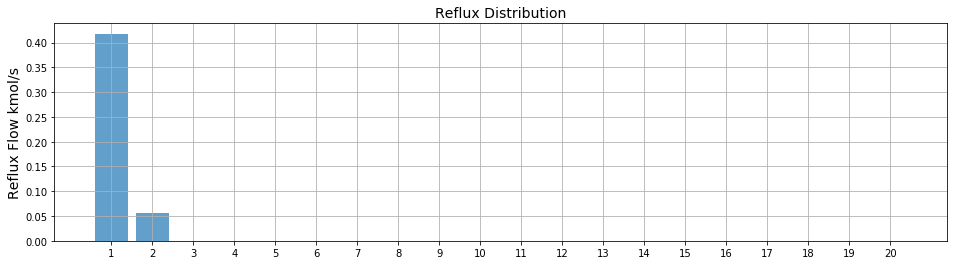

In [5]:
plot_reflux_distribution(model)